## Imports

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from datetime import datetime
nlp = spacy.load("en_core_web_sm")

In [29]:
def string_to_date(str_date):
    if len(str(str_date)) == "":
        return None
    for fmt in ('%d %B %Y', '%d %b %Y', '%B %Y', "%b %Y", "%Y"):
        try:
            return datetime.strptime(str(str_date), fmt)
        except ValueError:
            pass
    raise ValueError(f'no valid date format found for {str_date}')

In [32]:
letters = pd.read_pickle("letters.pickle")
original_dates_corrected = pd.read_csv("original_dates.csv", sep=";")

letters = pd.merge(letters, original_dates_corrected, left_index=True, right_on="index").dropna()
letters.original_date_corrected = letters.original_date_corrected.apply(string_to_date)
letters = letters.query("category != 'Mint'")

In [33]:
letters[letters["original_date"].apply(lambda x : "1680/1" in x)].head(20)
letters.to_csv("letters.csv")

In [34]:
letters[letters["author"].apply(lambda x : "burnet" in x.lower())].head(20)

,author,category,title,manuscript,original_date,original_place,languages,letter_content,index,original_date_corrected


In [44]:
letters

,author,category,title,manuscript,original_date,original_place,languages,letter_content,index,original_date_corrected
199,Isaac Newton,Mathematics,"Letter from Newton to a friend, together with ...",MS Add. 9597/2/18/3,23 February 1668/9,England,"[English, Latin]",3 Trinity College Cambridge Feb: 23d 16689 Sir...,NATP00226,1668-02-23 00:00:00
200,Isaac Newton,Mathematics,"Letter from Newton to Francis Aston, dated 18 ...",MS Add. 9597/2/18/4,18 May 1669,England,"[English, Latin]",4 Trinity College Cambridge May 18 1669 Franci...,NATP00227,1669-05-18 00:00:00
197,Isaac Newton,Mathematics,"Letter from Newton to John Collins, dated 19 J...",MS Add. 9597/2/18/1,19 January 1669/70,England,[English],1 Trinity College Cambridge. Ian 1669 Sir I re...,NATP00224,1669-01-19 00:00:00
198,Isaac Newton,Mathematics,"Letter from Newton to John Collins, dated 6 Fe...",MS Add. 9597/2/18/2,6 February 1669/70,England,"[English, French]",2 Trinity College Feb 6 1669.Cambridge. Sir Mr...,NATP00225,1669-02-06 00:00:00
201,Isaac Newton,Mathematics,"Letter from Newton to John Collins, dated 18 F...",MS Add. 9597/2/18/5,18 February 1669/70,England,[English],5. Feb 18th 166970. Sir Two days since I recei...,NATP00228,1669-02-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...
251,Isaac Newton,Mathematics,"Letter from Newton to Edmund Halley, dated 27 ...",MS Add. 9597/2/18/68*,27 May 1714,England,[English],68* May it please your Grace The letter you we...,NATP00278,1714-05-27 00:00:00
26,Isaac Newton,Science,"Letter to Louis d'Aumont, dated 3 June 1714",EL/N1/65,3 June 1714,England,[English],6565Newton 24 Lond June the 3d. 1714 May it pl...,NATP00336,1714-06-03 00:00:00
253,John Keill,Mathematics,"Letter from John Keill to Newton, c. 23–24 Feb...",MS Add. 9597/2/18/69,23–24 February 1715,England,[English],69 Honoured Sir I returned but last week to Ox...,NATP00280,1715-02-24 00:00:00
254,Isaac Newton,Mathematics,Draft Letter from Newton Concerning Treasury B...,MS Add. 9597/2/18/70,1718,England,"[English, Latin]",70. In answer to the Memorial of Mr Nicholson ...,NATP00281,1718-01-01 00:00:00


In [35]:
letters.iloc[0].letter_content

'3 Trinity College Cambridge Feb: 23d 16689 Sir I promised in a Letter to Mr Ent to give you an accompt of my Successe in a small attempt I had then in hand, And it is this; being perswaded of a certaine way whereby the Practicall part of Opticks might be promoted I thought it best to proceed by degrees and make a Small Prospective first to try whether my coniecture would hold good or not, The Instrument that I made is but Six Inches in Length, it beares something more then an Inch apperture, and a Plano=convex eye glasse whose depth is an o 16 or 17th part of an Inch, Soe that it Magnifies about 40 times in Diameter which is more then any 6 foote Tube can doe I beleeve with distinctnesse. But by reason of bad Materialls and for want of Good Pollish it represents not things so distinct as a 6. foote Tube will doe, yet I thinke it will discover as much as any 3. or 4. foote Tube especially if the Objects be Luminous; I have seen with it Iupiter distinctly round and his Satellites, and V

## Data exploration

### Counting 

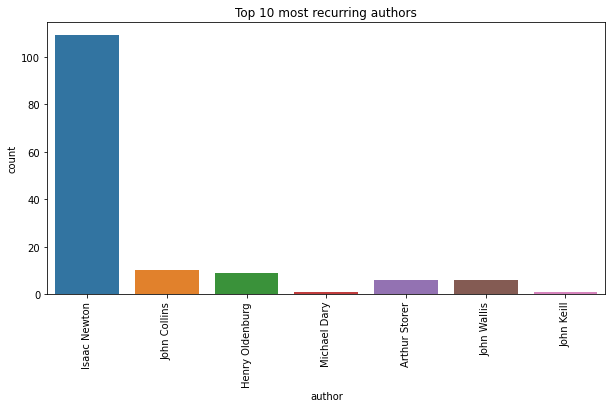

In [36]:
top_10_authors = letters.author.value_counts().index.to_list()[:20]
fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = letters[letters["author"].isin(top_10_authors)], x="author")
plt.xticks(rotation="vertical")
plt.title("Top 10 most recurring authors")
plt.show()

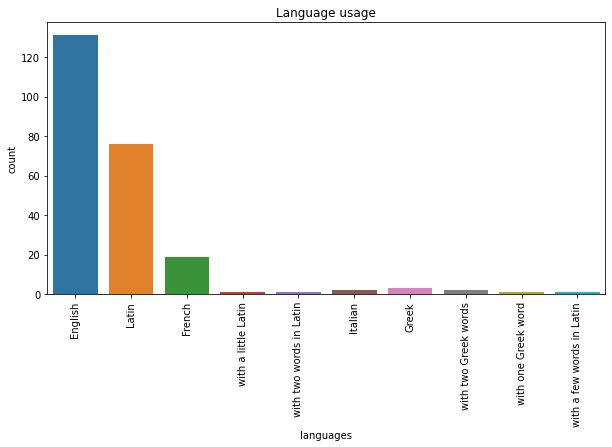

In [37]:
fig, axes = plt.subplots(figsize = (10, 5))
sns.countplot(data = letters.explode("languages"), x = "languages")
plt.xticks(rotation="vertical")
plt.title("Language usage")
plt.show()

<AxesSubplot:title={'center':'Total number of letters per year'}, xlabel='original_date_corrected', ylabel='Count'>

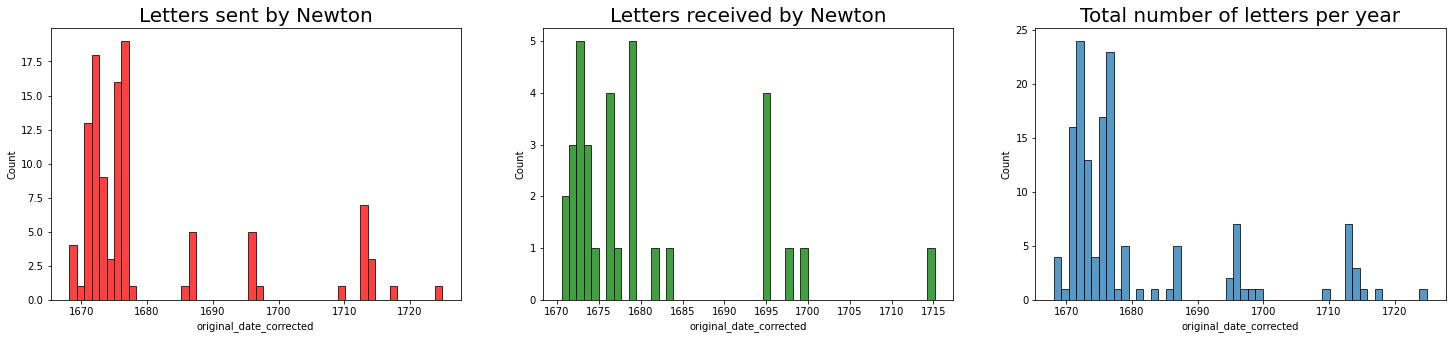

In [38]:
fig, axes = plt.subplots(1,3, figsize = (25, 5))

axes[0].set_title("Letters sent by Newton", fontsize=20)
sns.histplot(data = letters.query("author == 'Isaac Newton'"), x = "original_date_corrected", bins=50, ax=axes[0], color="red")
axes[1].set_title("Letters received by Newton", fontsize=20)
sns.histplot(data = letters.query("author != 'Isaac Newton'"), x = "original_date_corrected", bins=50, ax=axes[1], color="green")
axes[2].set_title("Total number of letters per year", fontsize=20)
sns.histplot(data = letters, x = "original_date_corrected", bins=50, ax=axes[2])

### Content analysis

Making a Spacy object with the first 100 letter

In [39]:
nlp.max_length = 1_600_000
doc = nlp(" ".join(letters[letters["languages"].apply(lambda row : "English" in row)].letter_content.values))

Counting the most reccuring words in these letters and printing the top 20 ones

In [40]:
from collections import Counter

#Without stopwords and punctuation
words = [token.text for token in doc if token.is_stop != True and token.is_punct != True]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common()

print(common_words[:60])

[('colours', 676), ('Mr', 568), ('light', 368), ('colour', 259), ('rays', 248), ('et', 235), ('parts', 234), ('shall', 214), ('Prism', 206), ('little', 200), ('water', 191), ('Newton', 190), ('bodies', 185), ('Air', 185), ('Sir', 181), ('white', 175), ('great', 163), ('like', 158), ('letter', 155), ('Red', 154), ('greater', 153), ('suppose', 151), ('found', 150), ('distance', 146), ('way', 144), ('eye', 142), ('severall', 140), ('order', 139), ('2', 137), ('hath', 134), ('refraction', 133), ('reflected', 129), ('bee', 128), ('=', 127), ('think', 127), ('+', 126), ('sent', 124), ('glasses', 124), ('yellow', 124), ('ad', 123), ('blew', 119), ('de', 117), ('thicknesse', 116), ('reason', 113), ('time', 113), ('red', 112), ('3', 109), ('second', 108), ('Blew', 107), ('things', 106), ('body', 106), ('series', 105), ('reflexion', 105), ('Azimuth', 105), ('said', 104), ('5', 102), ('4', 101), ('know', 101), ('est', 101), ('rayes', 101)]


In [41]:
with open("newton_religious_vocabulary.txt", "r") as file:
    religion_voc = file.read().replace(", ", ",").split(",")

In [43]:
n=0
x = 0
for w in words:
    x+= 1
    for v in religion_voc:
        if w == v:
            print(w)
            n+=1
print(n)

history
god
law
law
primitive
primitive
history
god
god
philosophy
10


In [17]:
#Without stopwords and punctuation
ents = [token.ents for token in doc if token.is_stop != True and token.is_punct != True]

AttributeError: 'spacy.tokens.token.Token' object has no attribute 'ents'

In [50]:
letters[letters["languages"].apply(lambda row : "Latin" in row)].letter_content.iloc[1]

"4 Trinity College Cambridge May 18 1669 Francis: Since in your letter you give mee so much liberty of spending my Judgment about what may bee to your advantage in travelling, I shall doe it more freely then perhaps would otherwise have beene decent. First therefore I will lay down some generall rules most of which I beleve you have considered already; but if any of them bee new to you they may excuse the rest, if none at all yet tis my punisment more in writing them then yours in reading them. When you come into any fresh company, 1, observe their humours; 2 suit your own carriage thereto, by which insinuation you will make their converse more free & open: 3 let your discours bee more in Quærys & doubtings than peremptory assertions or disputings, it being the designe of Travellers to learne not teach; besides it will persuade your acquaintance that you have the greater esteem of them & soe make them more ready to communicate what they know to you; whereas nothing sooner occasions dis

In [ ]:
letters